In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./wikipedia-vectors.csv')
df.head()

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)
titles=list(df.columns)
titles

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [3]:
print(df.shape)
df=df.T
df.shape

(13125, 60)


(60, 13125)

In [4]:
from sklearn.decomposition import NMF
model=NMF(n_components=6)
model.fit(df)
nmf_features=model.transform(df)
print(nmf_features.shape)
nmf_features

(60, 6)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.40586652e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66760199e-01],
       [3.82067321e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98756756e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81845202e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85649217e-01],
       [1.29296820e-02, 1.37890159e-02, 7.76293756e-03, 3.34488994e-02,
        0.00000000e+00, 3.34613965e-01],
       [0.00000000e+00, 0.00000000e+00, 2.06734345e-02, 0.00000000e+00,
        6.04557555e-03, 3.59160230e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.91110285e-01],
       [1.54280902e-02, 1.42817382e-02, 3.76616104e-03, 2.37113641e-02,
        2.62652074e-02, 

In [5]:
d=pd.DataFrame(nmf_features,index=titles)
print(d.loc['Anne Hathaway'])
d.loc['Denzel Washington']

0    0.003846
1    0.000000
2    0.000000
3    0.575718
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64


0    0.000000
1    0.005601
2    0.000000
3    0.422385
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

In [13]:
words=pd.read_csv('./wikipedia-vocabulary-utf8.txt', header= None,names=['words'])
words.head()

,words
0,aaron
1,abandon
2,abandoned
3,abandoning
4,abandonment


In [7]:
components_df=pd.DataFrame(model.components_,columns=words)
print(components_df.head())
components_df.shape

   (aaron,)  (abandon,)  (abandoned,)  (abandoning,)  (abandonment,)  \
0  0.011375    0.001210      0.000000       0.001738        0.000136   
1  0.000000    0.000010      0.005663       0.000000        0.000002   
2  0.000000    0.000008      0.000000       0.000000        0.004692   
3  0.004148    0.000000      0.003056       0.000000        0.000614   
4  0.000000    0.000568      0.004917       0.000000        0.000000   

   (abbas,)  (abbey,)  (abbreviated,)  (abbreviation,)    (abc,)   ...    \
0       0.0       0.0        0.002463     2.445511e-07  0.000834   ...     
1       0.0       0.0        0.000566     5.002592e-04  0.000000   ...     
2       0.0       0.0        0.000758     1.604307e-05  0.000000   ...     
3       0.0       0.0        0.002436     8.143163e-05  0.003985   ...     
4       0.0       0.0        0.000089     4.259132e-05  0.000000   ...     

   (zealand,)  (zenith,)  (zeppelin,)   (zero,)  (zeus,)  (zimbabwe,)  \
0    0.025779        0.0     0.008323

(6, 13125)

In [8]:
comp=components_df.iloc[3]
print(comp.shape)
print(comp.nlargest())

(13125,)
(film,)       0.627869
(award,)      0.253128
(starred,)    0.245281
(role,)       0.211448
(actress,)    0.186395
Name: 3, dtype: float64


In [9]:
components_df.head()

,"(aaron,)","(abandon,)","(abandoned,)","(abandoning,)","(abandonment,)","(abbas,)","(abbey,)","(abbreviated,)","(abbreviation,)","(abc,)",...,"(zealand,)","(zenith,)","(zeppelin,)","(zero,)","(zeus,)","(zimbabwe,)","(zinc,)","(zone,)","(zones,)","(zoo,)"
0,0.011375,0.001210,0.000000,0.001738,0.000136,0.0,0.0,0.002463,2.445511e-07,0.000834,...,0.025779,0.0,0.008323,0.000000,0.0,0.0,0.0,0.000000,0.000424,0.0
1,0.000000,0.000010,0.005663,0.000000,0.000002,0.0,0.0,0.000566,5.002592e-04,0.000000,...,0.008106,0.0,0.000000,0.001710,0.0,0.0,0.0,0.002813,0.000297,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004692,0.0,0.0,0.000758,1.604307e-05,0.000000,...,0.008731,0.0,0.000000,0.001317,0.0,0.0,0.0,0.000000,0.000143,0.0
3,0.004148,0.000000,0.003056,0.000000,0.000614,0.0,0.0,0.002436,8.143163e-05,0.003985,...,0.012594,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001742,0.006720,0.0
4,0.000000,0.000568,0.004917,0.000000,0.000000,0.0,0.0,0.000089,4.259132e-05,0.000000,...,0.001809,0.0,0.000000,0.000017,0.0,0.0,0.0,0.000192,0.001351,0.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
samples=pd.read_csv('./lcd-digits.csv')
samples=samples.values
digit=samples[0]
print(digit)
digit.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


(104,)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


ValueError: Colormap grey is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

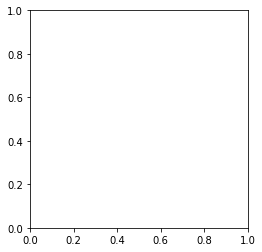

In [14]:
bitmap=digit.reshape(13,8) #Reshaping to 13x8 array: bitmap
print(bitmap)
plt.imshow(bitmap,cmap='grey',interpolation='nearest')
plt.colorbar()
plt.show()